## Analyzing, and Visualizing Data
_WeRateDogs dateset after wrangling...By Prasad Kintali_

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import numpy as np

%matplotlib inline

In [2]:
WeRateDogs_master = pd.read_csv('twitter_archive_master.csv')

In [3]:
WeRateDogs_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 15 columns):
tweet_id              2174 non-null int64
tweet_time            2174 non-null object
tweet_source          2174 non-null object
tweet_text            2174 non-null object
tweet_url             2174 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null int64
dog_name              2174 non-null object
jpg_url               1994 non-null object
tweet_retweet         1420 non-null float64
tweet_favorite        1420 non-null float64
dog_type              367 non-null object
dog_gender            901 non-null object
predictions           1686 non-null object
confidence            2174 non-null float64
dtypes: float64(4), int64(2), object(9)
memory usage: 254.8+ KB


In [4]:
### Change the datatypes of some of the columns
WeRateDogs_master['tweet_time'] = pd.to_datetime(WeRateDogs_master['tweet_time'])
WeRateDogs_master['dog_gender'] = WeRateDogs_master['dog_gender'].astype('category')

In [5]:
WeRateDogs_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 15 columns):
tweet_id              2174 non-null int64
tweet_time            2174 non-null datetime64[ns]
tweet_source          2174 non-null object
tweet_text            2174 non-null object
tweet_url             2174 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null int64
dog_name              2174 non-null object
jpg_url               1994 non-null object
tweet_retweet         1420 non-null float64
tweet_favorite        1420 non-null float64
dog_type              367 non-null object
dog_gender            901 non-null category
predictions           1686 non-null object
confidence            2174 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 240.1+ KB


### Plot correlation between some of the variable in the dataset

Text(0.5,1,'Correlation Map')

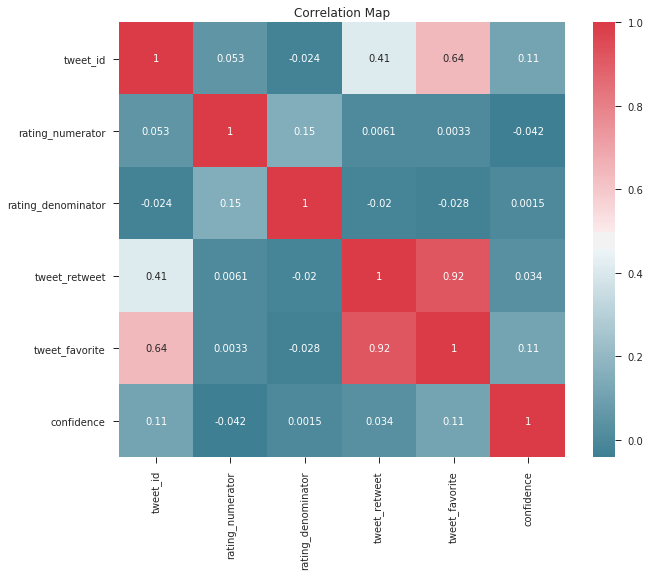

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = WeRateDogs_master.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)
plt.title('Correlation Map')

- The only strong correlation we see here is between tweet_favorites and tweet_retweet, this is normal (more favorites mean more retweets)
- Ignore the correlation 1, bacause it is the correlation between the same field

Let dig more into the relation between tweet_favorites and tweet_retweet

### Retweet and Favorites

Text(0.5,1,'Relation between retweet and favorite')

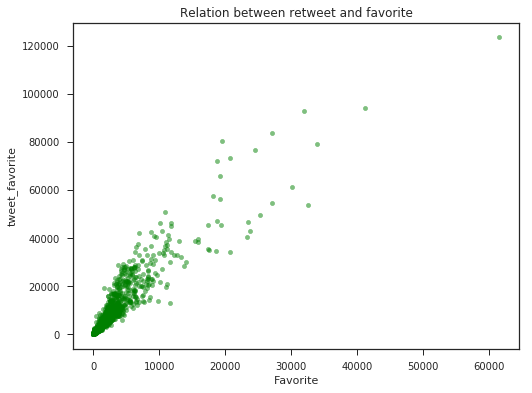

In [7]:
WeRateDogs_master.plot(x= 'tweet_retweet', y = 'tweet_favorite', kind = 'scatter', alpha = 0.5, color = 'green', figsize=(8, 6))
plt.xlabel('Retweet')
plt.xlabel('Favorite')
plt.title('Relation between retweet and favorite')

As the correlation map shows if the count of retweet is high the count of favorites go high

#### Also I would like to show here the tweet with maximimum retweet and favorite counts

In [8]:
print("The maximum retweeted tweet is {} with {} retweets". format(WeRateDogs_master.iloc[WeRateDogs_master['tweet_retweet'].idxmax()].tweet_url, 
                                                                   WeRateDogs_master.iloc[WeRateDogs_master['tweet_retweet'].idxmax()].tweet_retweet.astype(int)))

The maximum retweeted tweet is https://twitter.com/dog_rates/status/807106840509214720/video/1 with 61459 retweets


In [9]:
print("The favorite tweet is {} with {} number of likes". format(WeRateDogs_master.iloc[WeRateDogs_master['tweet_favorite'].idxmax()].tweet_url, 
                                                                   WeRateDogs_master.iloc[WeRateDogs_master['tweet_favorite'].idxmax()].tweet_favorite.astype(int)))

The favorite tweet is https://twitter.com/dog_rates/status/807106840509214720/video/1 with 123454 number of likes


### Rating

Text(0.5,1,'Rating System')

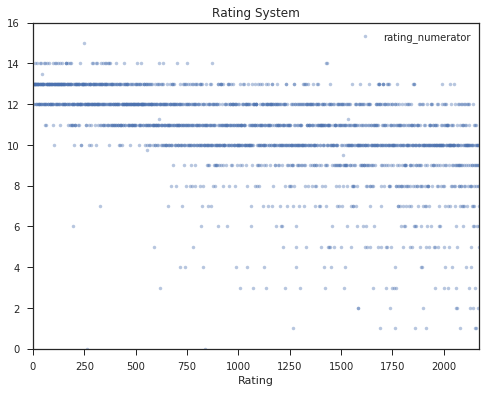

In [10]:
WeRateDogs_master.plot(y= 'rating_numerator', ylim=[0,16], style = '.', alpha = .4,  figsize=(8, 6))
plt.xlabel('Retweet')
plt.xlabel('Rating')
plt.title('Rating System')

### Dog Genders

Text(0.5,1,'Dogs gender')

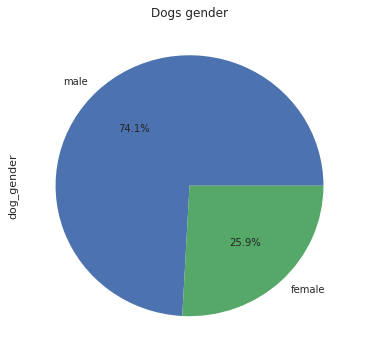

In [11]:
WeRateDogs_master.dog_gender.value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Dogs gender')

In [12]:
# Which gender had high ratings
WeRateDogs_master.groupby('dog_gender').rating_numerator.mean()

dog_gender
female    11.830472
male      10.739895
Name: rating_numerator, dtype: float64

According the above anlysis, we have 74% male dogs, where as we have only 26% of female dogs. But the average rating for the female dogs are above than the male dogs.

### Famous dog Stages

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Count')

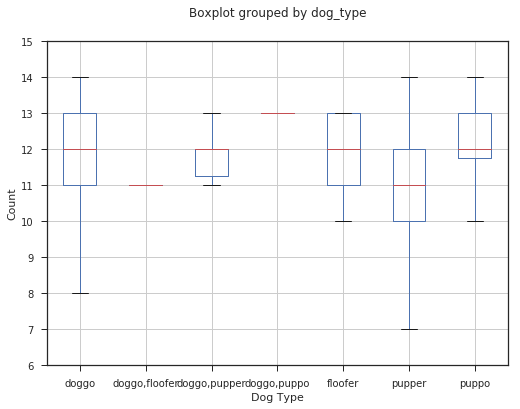

In [13]:
WeRateDogs_master.boxplot(column = ['rating_numerator'], by = ['dog_type'], figsize=(8,6))
plt.title('')
plt.ylim(6,15)
plt.xlabel('Dog Type')
plt.ylabel('Count')

### Famous Breeds

Text(0.5,1,'Famous Breeds')

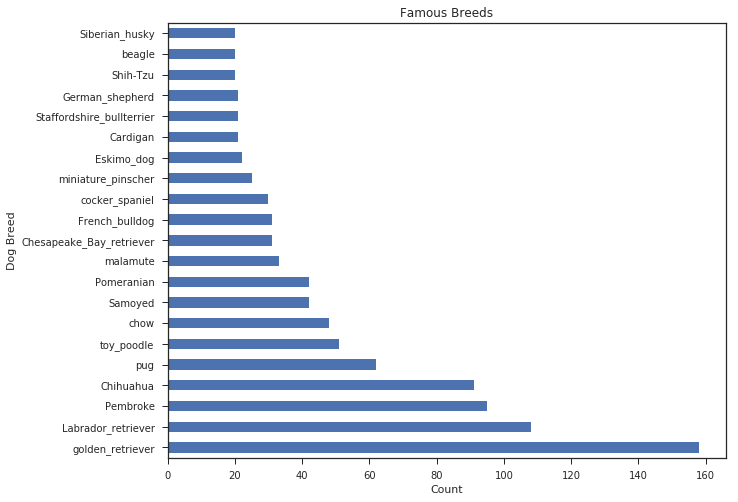

In [14]:
WeRateDogs_by_breed = WeRateDogs_master.groupby('predictions').filter(lambda x: len(x) >= 20)

WeRateDogs_by_breed.predictions.value_counts().plot(kind = 'barh', figsize=(10,8))
plt.ylabel('Dog Breed')
plt.xlabel('Count')
plt.title('Famous Breeds')

- Top two famous breeds are : Golden_retriver and Labrador_retriver according to a meural network that can classify breeds of dogs

## Conclusion

The Twitter account WeRateDogs (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10". It has acquired over 4.50 million followers since its debut.

If you are thinking of adopting a dog, get a floof(er) - far away from being pupper at least still in the stage of puppo yet not a doggo to live more togother - take pictures, send it to @dog_rates and get funny cute comments with high rates :)